<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/05w_0402_tue_B_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 05주차 B반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.6 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

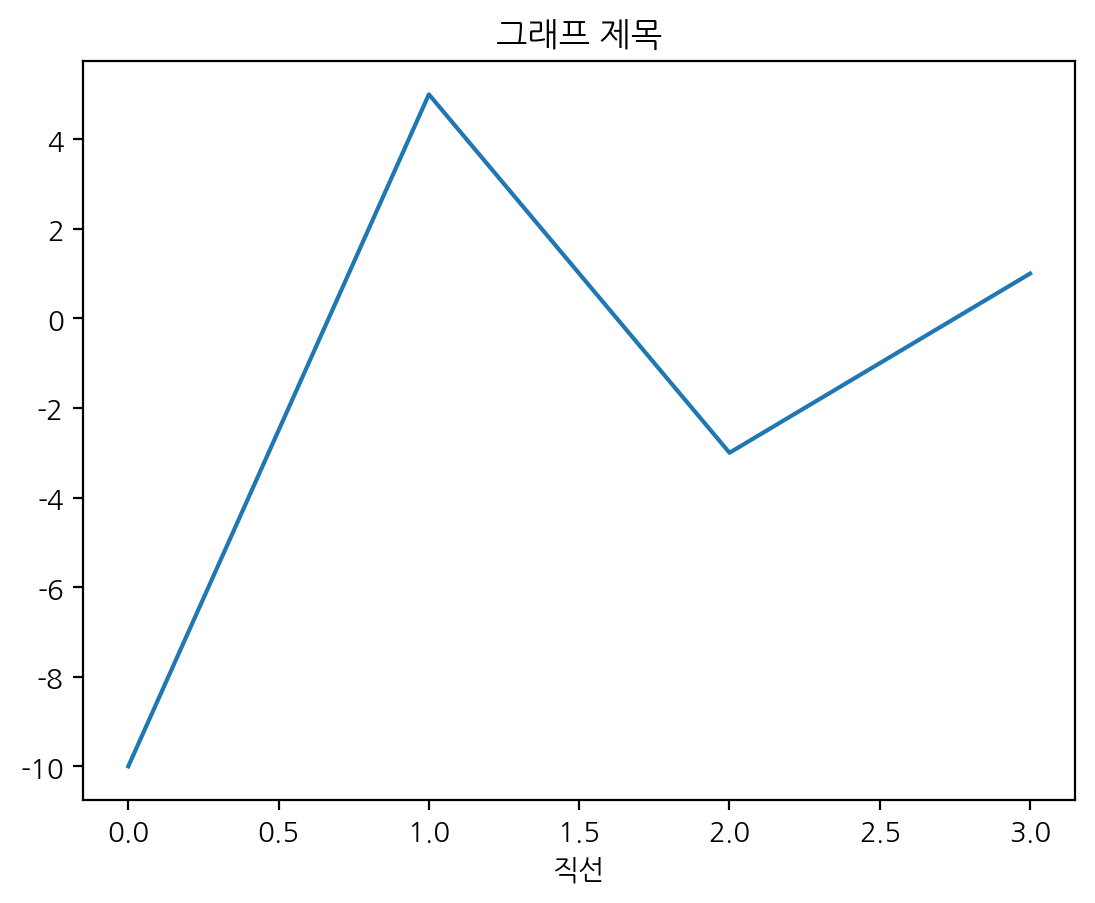

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [7]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.47 MiB/s, done.


In [13]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
19,20,5,78,83,58
15,16,4,58,98,65
14,15,4,75,56,78
13,14,4,48,87,12


In [16]:
exam.agg('mean')

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [18]:
exam.agg(['mean', 'median'])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [21]:
exam.agg(mean_math = ('math', 'mean')) # 시험 예상

,math
mean_math,57.45


In [23]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [24]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [28]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=0) # 시험 예상

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [29]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=1) # 시험 예상

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [30]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [31]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [32]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [33]:
df.agg("mean")

A    4.0
B    5.0
C    7.0
dtype: float64

In [34]:
df.agg("mean", axis=0)

A    4.0
B    5.0
C    7.0
dtype: float64

In [35]:
df.agg("mean", axis='index')

A    4.0
B    5.0
C    7.0
dtype: float64

In [36]:
df.agg("mean", axis=1)

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [37]:
df.agg("mean", axis='columns')

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [38]:
df.agg(['sum', "mean"], axis='columns')

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [39]:
df.agg(['sum', "mean"], axis='index')

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


### 집단별 요약 통계량 구하기

In [40]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [47]:
exam.groupby('nclass').agg('mean')

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [50]:
exam.groupby('nclass').agg('mean')[["math", "english", "science"]]

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [51]:
exam.groupby('nclass').agg(['min', 'max', 'mean'])

id           math            english            science           
       min max  mean  min max   mean     min max   mean     min max   mean
nclass                                                                    
1        1   4   2.5   30  60  46.25      86  98  94.75      50  78  61.50
2        5   8   6.5   25  90  61.25      78  90  84.25      25  98  58.25
3        9  12  10.5   20  65  45.00      65  98  86.50      15  65  39.25
4       13  16  14.5   46  75  56.75      56  98  84.75      12  78  55.00
5       17  20  18.5   65  89  78.00      68  83  74.25      58  98  83.25

In [52]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [53]:
exam.groupby('nclass').agg(meanmath = ('math', 'mean'))

,meanmath
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [56]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [57]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

## 정리하기

In [ ]:
# 1. 데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박동현,60,100
3,김민지,70,20


## 종료